In [5]:
#header(헤더)

import requests
from bs4 import BeautifulSoup as bs

url="https://www.melon.com/chart/index.htm"
header={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 Edg/127.0.0.0"}
response=requests.get(url,headers=header) #해더 추가
print(response.status_code) #406. user-Agent 발생
print()


html=response.text
soup=bs(html,"html.parser")
# print(soup) #페이지가 html형식으로 잘 변형되었는지 확인

#멜론뮤직에서 1위부터 50위 까지 순위 추출
rank=soup.find_all("span",class_="rank")[1].text
# print(rank)

#곡이름
songs=soup.find_all("tr",class_="lst50")
# print(song)

#반복문을 통해 행으로 뽑기
# for i in songs:        #rank만큼 반복하면 안되는이유 : 우리는 지금 50위까지만 뽑고싶은건데 rank에는 100위까지 저장되어있음. song는 50리스트로 나눠놓음
#     rank=i.find("span",class_="rank").text
#     song=i.find(class_="ellipsis rank01").text
#     singer=i.find(class_="ellipsis rank02").text
#     print(f"{rank}위 곡 명: {song} 가수: {singer}")

melon_li=[]

for i in songs:     
    rank=i.find("span",class_="rank").text+"위"
    title=i.find_all("a")[2].text
    singer=i.find_all("a")[4].text
    melon_li.append([rank,title,singer])

print(melon_li)

200

[['1위', 'WAY 4 LUV', 'PLAVE'], ['2위', 'Pump Up The Volume!', 'PLAVE'], ['3위', '우리 영화', 'PLAVE'], ['4위', 'Supernova', 'aespa'], ['5위', 'From', 'PLAVE'], ['6위', 'Watch Me Woo!', 'PLAVE'], ['7위', '여섯 번째 여름', 'PLAVE'], ['8위', '클락션 (Klaxon)', '(여자)아이들'], ['9위', '버추얼 아이돌', 'PLAVE'], ['10위', 'Sticky', 'KISS OF LIFE'], ['11위', 'How Sweet', 'NewJeans'], ['12위', '사랑은 늘 도망가', '임영웅'], ['13위', '소나기', '이클립스 (ECLIPSE)'], ['14위', 'Small girl (feat. 도경수(D.O.))', '이영지'], ['15위', 'Merry PLLIstmas', 'PLAVE'], ['16위', '온기', '임영웅'], ['17위', '우리들의 블루스', '임영웅'], ['18위', 'Home', '임영웅'], ['19위', 'Welcome to the Show', 'DAY6 (데이식스)'], ['20위', '한 페이지가 될 수 있게', 'DAY6 (데이식스)'], ['21위', '모래 알갱이', '임영웅'], ['22위', '다시 만날 수 있을까', '임영웅'], ['23위', 'Supernatural', 'NewJeans'], ['24위', '이제 나만 믿어요', '임영웅'], ['25위', 'Do or Die', '임영웅'], ['26위', '무지개', '임영웅'], ['27위', 'London Boy', '임영웅'], ['28위', '고민중독', 'QWER'], ['29위', 'Polaroid', '임영웅'], ['30위', '인생찬가', '임영웅'], ['31위', 'HAPPY', 'DAY6 (데이식스)'], ['32위', 'Armageddon', '

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

df=pd.DataFrame(melon_li,columns=["순위","노래제목","가수명"])
df=df.set_index('순위') #순위를 행으로 지정
df

#웹크롤링으로 만든 데이터 프레임 CSV파일로 저장하기
df.to_csv("./melon_rank.csv")

#웹크롤링으로 만든 데이터 다시 읽어오기
pd.read_csv("./melon_rank.csv",index_col=[0])

,노래제목,가수명
순위,,
1위,Supernova,aespa
2위,클락션 (Klaxon),(여자)아이들
3위,How Sweet,NewJeans
4위,Sticky,KISS OF LIFE
5위,Small girl (feat. 도경수(D.O.)),이영지
6위,Supernatural,NewJeans
7위,소나기,이클립스 (ECLIPSE)
8위,고민중독,QWER
9위,한 페이지가 될 수 있게,DAY6 (데이식스)


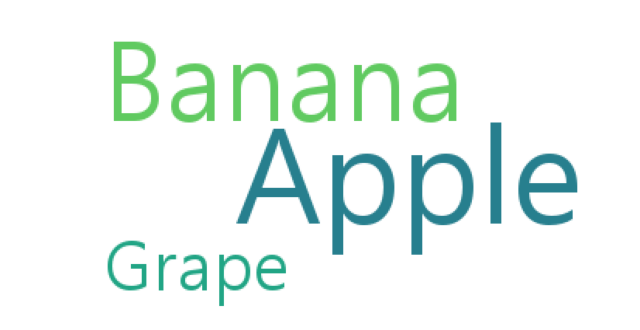

In [7]:
#word cloud: 워드 클라우드(빅데이터 기반 시각화)
#word cloud도 패키지 이기때문에 import로 로드 해준다음에 작성함
#시각화랑 연관되어있기때문에 맷플로립도 함께 로드 해서 작성함

import wordcloud
import matplotlib.pyplot as plt

#word cloud 객체 생성
di={"Apple":12,"Banana":8,"Grape":2}

wc=wordcloud.WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                      background_color="white")
      
cloud=wc.generate_from_frequencies(di) #워드 클라우드가 빈도별로 시각화를 하는작업이라
#빈도를 기반으로 값을 보겠다고 지정하는것 
#여기까지가 워드 클라우드 작업

#시각화를 위한 캔버스 그리기
plt.figure(figsize=(8,6))
plt.imshow(cloud) #빈도 값 설정한거 보여달라는뜻 
plt.axis("off") #축 비활성화
plt.show()

#imshow는 이미지 데이터를 화면에 출력하기 위해 사용
#show는 지금까지 작성된 구문을 전부 실행시켜서 보여달라는 뜻

{'aespa': 2, '(여자)아이들': 2, 'NewJeans': 7, 'KISS OF LIFE': 1, '이영지': 1, '이클립스 (ECLIPSE)': 1, 'QWER': 1, 'DAY6 (데이식스)': 3, '아일릿(ILLIT)': 1, 'TWS (투어스)': 2, 'IVE (아이브)': 2, '임영웅': 13, '지코 (ZICO)': 1, '이창섭': 1, '이무진': 1, 'Crush': 1, 'RIIZE': 1, '순순희(지환)': 1, '아이유': 1, '정국': 1, '임재현': 1, 'PLAVE': 2, '너드커넥션 (Nerd Connection)': 1, '태연 (TAEYEON)': 1, '박재정': 1}


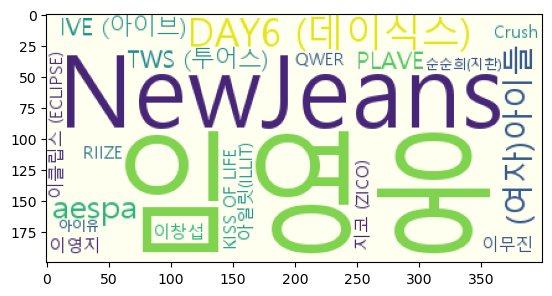

In [5]:
#<실습>
#1) 가수출현 빈도수 딕셔너리 만들기
#키값에 가수명, 벨류에는 빈도수(정수)

df1=df['가수명']
df1

word={}


for i in df1:
    if i in word.keys():
        word[i]+=1
    else:
        word[i]=1
print(word)


#월드클라우드 만들기
import wordcloud
import matplotlib.pyplot as plt

#월드 클라우드의 객체 만들기

wc=wordcloud.WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                      background_color="ivory",max_words=20)
#빈도수 확인
cloud=wc.generate_from_frequencies(word)

#맷플로립 작업
plt.figure()
plt.imshow(cloud)
# plt.axis("off")
plt.show()

In [5]:
#데이터 전처리 : 누락데이터나 유효하지 않은 데이터들을 수정하거나 삭제하기 위해 사용
#유효하지 않은 데이터 : NaN
#NaN을 찾을 때 사용하는 메소드 : 1. isnull / 2. notnull

#데이터 프레임의 요악정보 출력

import seaborn as sns
df=sns.load_dataset("titanic")
df


print("===요약정보 확인===")
print(df.info())
#RangeIndex: 891 -> 데이터 갯수
#deck         203 non-null -> deck열에 유효한데이터 (non-null)이 고작 203개 밖에 없다
#891-203 = 688개의 누락데이터 존재

print("===누락데이터 확인===")
nan_deck=df['deck'].value_counts(dropna=False)
#value_counts() 써서 deck열이 가지고 있는 범주값 확인
#dropna=False : nan값도 같이 확인하겠다는것.  설정하지 않으면 유효한 데이터의 갯수만 출력. 
print(nan_deck) #범주값 당 데이터가 얼마나 있는지 확인(유효하지 않은 NaN값 포함해서)
print()

# 누락데이터 확인
df.isnull()
df.notnull()


#위의 메소드사용하여 nan의 갯수 파악하기
print(df.isnull().sum())
#논리형 데이터 숫자로 변환하면 True는 1이고 False는 0
#isnull데이터를 활용하여 True의 값을 sum해서 갯수 파악한것 

===요약정보 확인===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
===누락데이터 확인===
deck
NaN    688
C       59
B       47
D      

In [6]:
#NaN값이 500개 이상인 열 제거
import pandas as pd

print(df.isnull().sum())
#isnull과 sum함수 사용하여 각 행마다 NaN값 확인했더니 deck열만 NaN값이 500개가 넘음
print()

df_drop=df.dropna(axis=1,thresh=500) #NaN값이 500개 이상인것만 열 삭제
print(df_drop.isnull().sum()) #deck열이 아예 빠져있음
print('deck' in df_drop.columns)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64
False


In [53]:
#행기준 삭제
#데이터 프레임 행 갯수 확인
print(f"삭제 전 행의 갯수 : {len(df)}")

#나이 데이터가 없는 모든 행 삭제
df_age=df.dropna(subset=["age"],axis=0, how="any")
print(f"삭제 후 행의 갯수 : {len(df_age)}")

#is null과 snum 사용해서 누락데이터 갯수 확인
print(df["age"].isnull().sum()) #누락데이터가 177개
print(891-177)

삭제 전 행의 갯수 : 891
삭제 후 행의 갯수 : 714
177
714


In [36]:
#데이터 치환
#age열 데이터 10개만 가져오기
print(df['age'].head(10)) #5번 인덱스 보면 NaN값 존재
print()

#누락데이터 갯수 확인
print(df['age'].isnull().sum()) #177개

#age열에 NaN값을 나이 데이터의 중간값으로 변경
median_age=df['age'].median() #나이의 중간값 : 28.0세
print(median_age) #나이의 중간값 변수 저장
print()

df['age'].fillna(median_age,inplace=True)

print(df['age'].head(10))
print(df['age'].isnull().sum()) #0개. fillna를 사용하여 NaN값을 치환해주었기때문에 NaN값이 출력되지 않음

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

0
28.0

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64
0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_36760\1595215480.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age,inplace=True)


In [129]:
#누락데이터 치환 함수 fillna

import seaborn as sns
df=sns.load_dataset('titanic')
df['embark_town'] #타이타닉 승객들이 어디서 승선했는지

#embark_town의 범주값 확인(결측값 NaN도 함께!)
df['embark_town'].value_counts(dropna=False) #범주값으로 NaN값도 같이 확인

print(df['embark_town'][825:831]) #829번째 인덱스 행이 NaN값
print()

#숫자의 경우에는 NaN값을 중간값이나 다른 값으로 대체가 가능한데 문자는 중간값이나 특정값을 따로 구할수없음
#보통은 아예 NaN값을 삭제 하거나 최빈값을 구해서 넣어주는 경우가 많음
#최빈값 : 가장 많이 등장하는 값

#승선도시 확인
df['embark_town'].value_counts(dropna=False)#Southampton이 최빈값!
print()

most=df['embark_town'].value_counts(dropna=True).idxmax()
#dropna=True : 결측치 제외해서 범주값확인
#idxmax() : 최빈값 반환
print(most) #최빈값 확인 
print()

#결측치 치환
df['embark_town'].fillna(most,inplace=True)

print(df['embark_town'][825:831]) #NaN값이었던 829행이 최빈값으로 변경

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object


Southampton

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13504\1611460681.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(most,inplace=True)


In [177]:
#fillna(method='ffill')
#fillna(method='bfill')

import seaborn

df=sns.load_dataset('titanic')
df['embark_town'] #승선정보
print(df['embark_town'][825:831])
print()

df1=df.copy()
df1

#fillna(method='ffill') : 전의 행값으로 대체
#지금에서 NaN 전값은 Queenstown

df1['embark_town'].fillna(method='ffill',inplace=True)
print(df1['embark_town'][825:831])
print()


#fillna(method='bfill')
df2=df.copy()
df2
df2['embark_town'].fillna(method='bfill',inplace=True)
print(df2['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13504\1329778449.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['embark_town'].fillna(method='ffill',inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13504\1329778449.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['embark_town'].fillna(method='ffill',inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13504\1329778449.py:25: F